# TC.L.ITF.1.2.1.2 PASD Integration  

# Version: 07Aug2023 

* Integrate PASD, including Smart boxes, their FEMs, fiber cable assemblies, preADU cards, and test 

    (1) for adequate gain of the assembly, indicating that integration is successful.
    
    (2) Provide noise from SSG corresponding to total power from antenna corresponding to 
    mean sky brightness and check for substantial change in output power leval from the 
    assembled system when noise source is switched ON/OFF.


In [17]:
import csv

import matplotlib.pyplot as plt
import numpy as np
import scipy.constants

PI = np.pi
KB = scipy.constants.k

# Define path where .csv files are stored
PATH = "/Users/sub005/Desktop/SKA_LOW/AIV/ITF Tests/PASD_Integration_TC_07Aug2023/"

In [18]:
# Define function to return numpy arrays of frequency and power from csv recordings
# of SA frequency in MHz; power in dBm/MHz


def get_frequency_spectrum(INFILE):
    sflag = 0
    freq = []
    Pdb0 = []
    with open(INFILE) as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if row != []:
                if sflag == 1 and row[0] != "END":
                    freq.append(float(row[0]) / 1e6)
                    Pdb0.append(float(row[1]))
                if row[0] == "BEGIN":
                    sflag = 1

    freq = np.array(freq, dtype=np.float32)
    Pdb0 = np.array(Pdb0, dtype=np.float32)

    return (freq, Pdb0)

# Computations of the predicted outputs

* Input power level at FEMs are set to be, mid-band at 200 MHz: 690 K antenna temperature == 9.52x10^-15 W/MHz
* Adding in a receiver noise of 40 to 70 K (assume 55 K): the system temperature equivalent noise power is 1.03x10^-14 W/MHz.  This is -109.88 dBm/MHz.


* Scaled up by 43 db nominal gain of ther LNA, minus 2 dB cable attenuation (net +41 dB gain) the input power at FEMs is expected to be -68.88 dBm/MHz.


* Assuming 41 dB minimum gain in the FEM + preADU assembly, the output power after the preADU is expected to be -68.88 + 41 = -27.88 dBm/MHz.  Check is made that power output at 200 MHz exceeds about -28 dBm/MHz.


* Note: If the nominal power level at preADU output and ADU input is to be -2.7 dBm, the nominal power spectral density is to be -28.14 dBm/MHz.


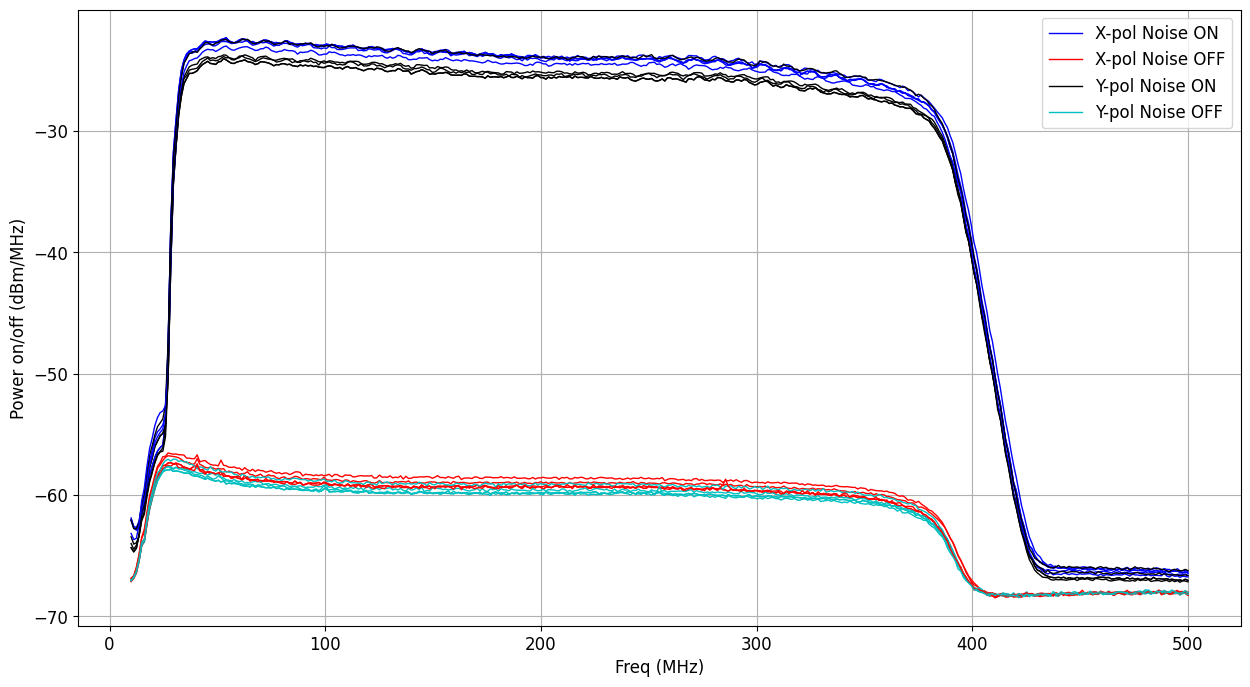

In [19]:
plt.figure(figsize=[15, 8])
plt.rcParams.update({"font.size": 12})
ax1 = plt.subplot(1, 1, 1)

schn = 0
for i, j in [[1, 1], [1, 2], [2, 1], [2, 2]]:
    schn += 1
    if schn == 5:
        schn += 1
    INFILE = "TC2_SB" + str(i) + "_" + str(j) + "x_ch" + str(schn) + "_noise_on.csv"
    freq, Pdbm = get_frequency_spectrum(PATH + INFILE)
    if i == 1 and j == 1:
        ax1.plot((freq), Pdbm, "b-", linewidth=1, label="X-pol Noise ON")
    ax1.plot((freq), Pdbm, "b-", linewidth=1)
    INFILE = "TC2_SB" + str(i) + "_" + str(j) + "x_ch" + str(schn) + "_noise_off.csv"
    freq, Pdbm = get_frequency_spectrum(PATH + INFILE)
    if i == 1 and j == 1:
        ax1.plot((freq), Pdbm, "r-", linewidth=1, label="X-pol Noise OFF")
    ax1.plot((freq), Pdbm, "r-", linewidth=1)

    if schn != 6:
        schn += 1
    INFILE = "TC2_SB" + str(i) + "_" + str(j) + "y_ch" + str(schn) + "_noise_on.csv"
    freq, Pdbm = get_frequency_spectrum(PATH + INFILE)
    if i == 1 and j == 1:
        ax1.plot((freq), Pdbm, "k-", linewidth=1, label="Y-pol Noise ON")
    ax1.plot((freq), Pdbm, "k-", linewidth=1)
    INFILE = "TC2_SB" + str(i) + "_" + str(j) + "y_ch" + str(schn) + "_noise_off.csv"
    freq, Pdbm = get_frequency_spectrum(PATH + INFILE)
    if i == 1 and j == 1:
        ax1.plot((freq), Pdbm, "c-", linewidth=1, label="Y-pol Noise OFF")
    ax1.plot((freq), Pdbm, "c-", linewidth=1)

plt.ylabel("Power on/off (dBm/MHz)")
plt.xlabel("Freq (MHz)")
# plt.xlim([50.0,350.0])
# plt.ylim([-40,-10])
plt.legend(loc="best")
plt.grid()
plt.show()

# Note

* Switching on/off the noise source at Smart box input, the preADU output power changes by more than 30 dB.

* Viewed in 10 to 500 MHz range, the spectrum appears as a band limited signal with cutoff below 50 MHz and above 350 MHz.  These cutoffs are expected from the HPF in the FEM and LPF in the preADU.


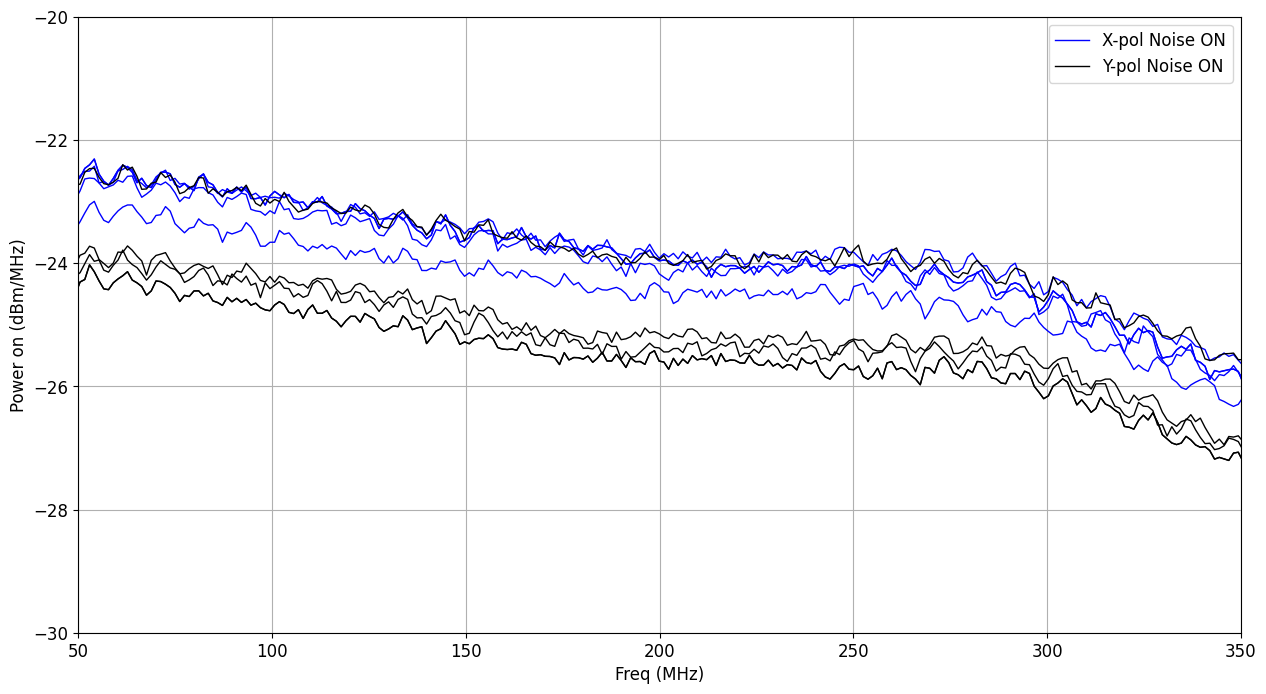

In [20]:
plt.figure(figsize=[15, 8])
plt.rcParams.update({"font.size": 12})
ax1 = plt.subplot(1, 1, 1)

schn = 0
for i, j in [[1, 1], [1, 2], [2, 1], [2, 2]]:
    schn += 1
    if schn == 5:
        schn += 1
    INFILE = "TC2_SB" + str(i) + "_" + str(j) + "x_ch" + str(schn) + "_noise_on.csv"
    freq, Pdbm = get_frequency_spectrum(PATH + INFILE)
    if i == 1 and j == 1:
        ax1.plot((freq), Pdbm, "b-", linewidth=1, label="X-pol Noise ON")
    ax1.plot((freq), Pdbm, "b-", linewidth=1)

    if schn != 6:
        schn += 1
    INFILE = "TC2_SB" + str(i) + "_" + str(j) + "y_ch" + str(schn) + "_noise_on.csv"
    freq, Pdbm = get_frequency_spectrum(PATH + INFILE)
    if i == 1 and j == 1:
        ax1.plot((freq), Pdbm, "k-", linewidth=1, label="Y-pol Noise ON")
    ax1.plot((freq), Pdbm, "k-", linewidth=1)

plt.ylabel("Power on (dBm/MHz)")
plt.xlabel("Freq (MHz)")
plt.xlim([50.0, 350.0])
plt.ylim([-30, -20])
plt.legend(loc="best")
plt.grid()
plt.show()


* Success in integration is when power spectral density, mid band, exceeds about -28 dBm/MHz.
